In [1]:
!nvidia-smi

Mon Oct 31 12:09:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:65:00.0  On |                  N/A |
|  0%   39C    P8    18W / 170W |    240MiB / 12288MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

conda activate 가상환경

python.exe -m pip install --upgrade pip

pip install keras-cv
https://pypi.org/project/keras-cv/

pip install translate
https://pypi.org/project/translate/

pip install gradio
https://wooiljeong.github.io/etc/intro-gradio/

In [2]:
import time
import keras_cv
# https://keras.io/api/keras_cv/models/stable_diffusion/
from tensorflow import keras
import matplotlib.pyplot as plt

c:\Users\angel\anaconda3\envs\tf_dl\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
198180272/198180272 [==============================] - 92s 0us/step


In [4]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
        plt.tight_layout()

첫 번째 이미지 생성 in English

25/25 [==============================] - 42s 2s/step


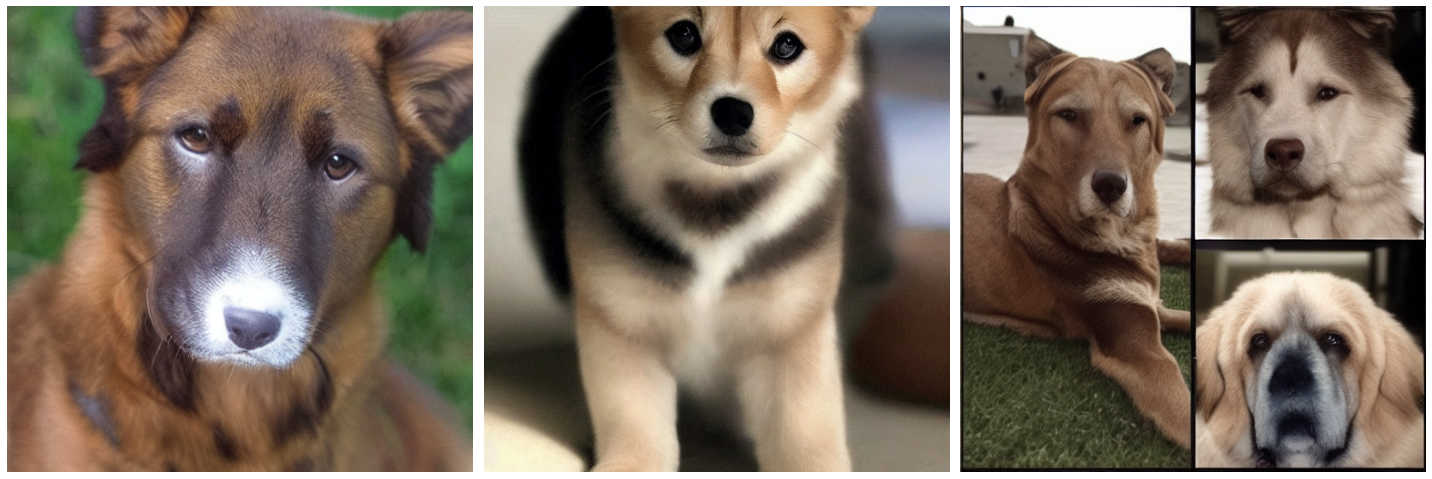

In [29]:
images = model.text_to_image("handsome boy", batch_size=3)

plot_images(images)

25/25 [==============================] - 43s 2s/step


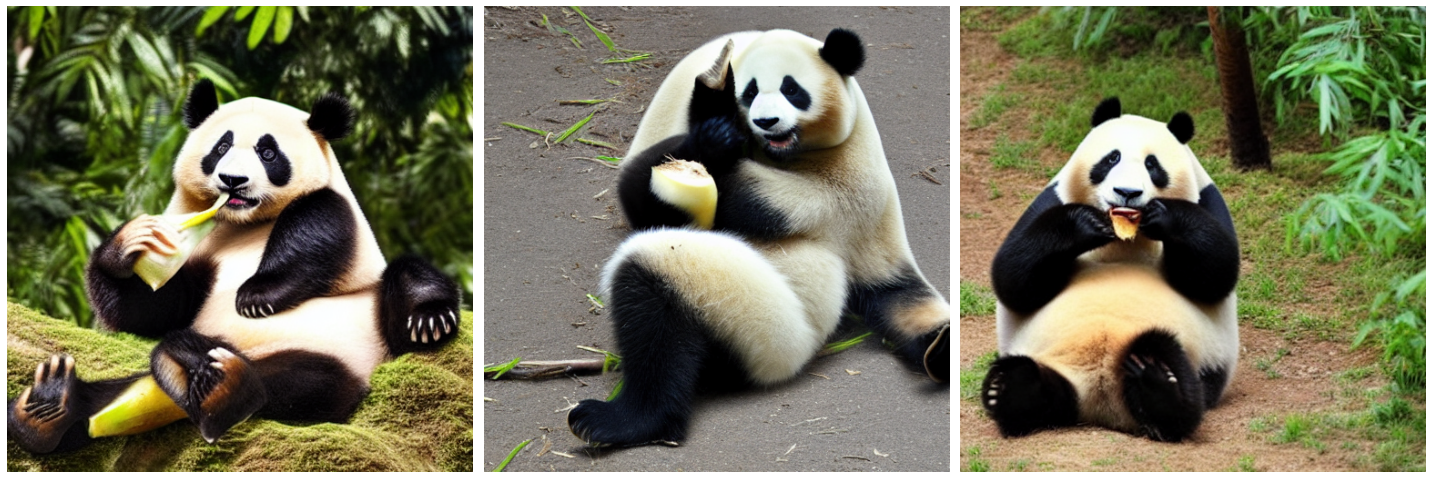

In [35]:
images = model.text_to_image("A lazy panda is eating banana", batch_size=3)

plot_images(images)

25/25 [==============================] - 43s 2s/step


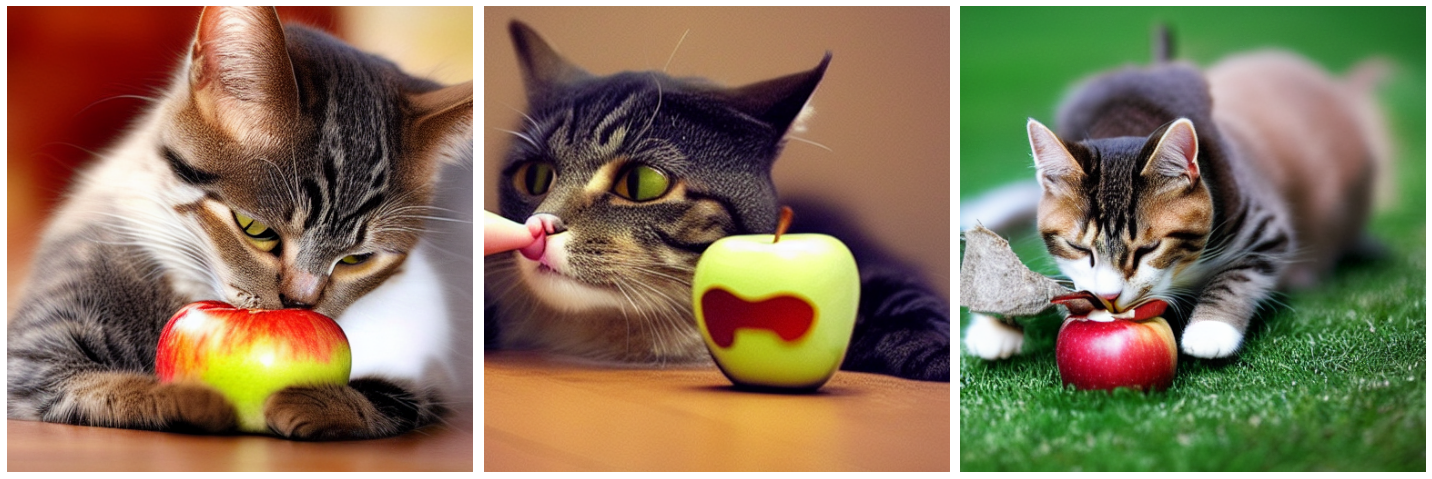

In [36]:
images = model.text_to_image("A cat is eating apple and feel happy", batch_size=3)

plot_images(images)

In [37]:
from translate import Translator

translator = Translator(from_lang='ko', to_lang='en')
translation = translator.translate("우주 비행사가 말을 타고 있는 사진")
translation

'Photo of an astronaut riding a horse'

In [47]:
def generate_image_ko(text, batch_size=3, target_language='ko'):
    print(text)
    if target_language != 'ko':
        translator = Translator(from_lang=target_language, to_lang='en')
    else:
        translator = Translator(from_lang=target_language, to_lang='en')
    translation = translator.translate(text)
    print(translation)
    images = model.text_to_image(translation, batch_size=batch_size)

    return images

In [48]:
def generate_image_en(text, batch_size=3):
    print(text)
    images = model.text_to_image(translation, batch_size=batch_size)

    return images

고양이가 김밥을 먹는 모습
A cat eats kimbap
25/25 [==============================] - 42s 2s/step


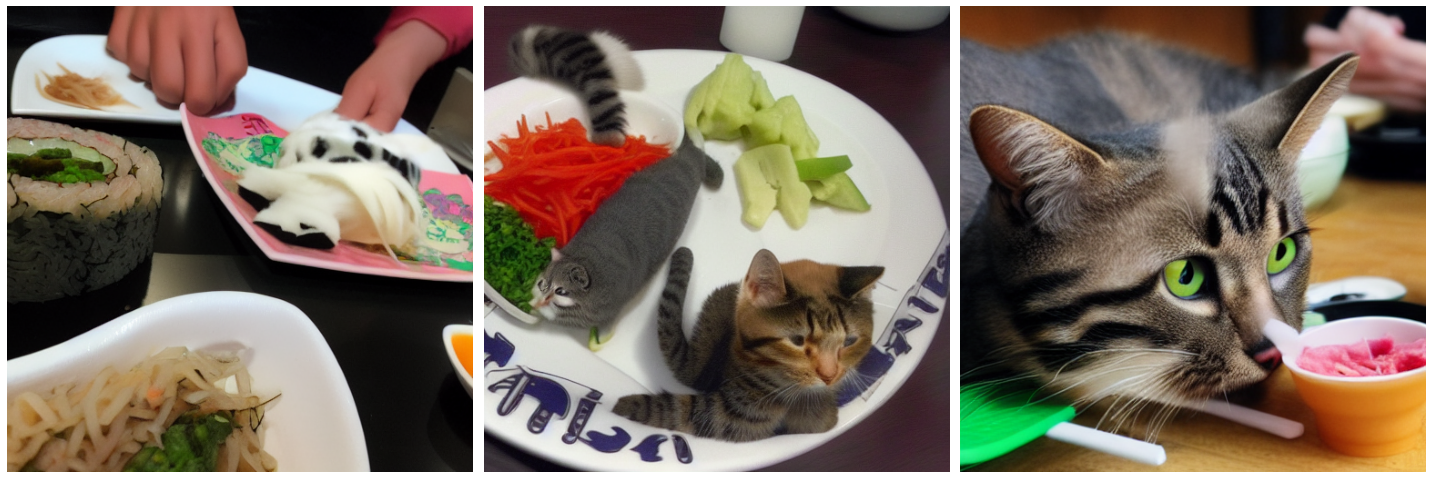

In [45]:
images = generate_image_ko("고양이가 김밥을 먹는 모습")
plot_images(images)

In [49]:
import gradio as gr

def inference(text):
    image = generate_image_ko(text, 1).squeeze()
    return image

demo = gr.Interface(fn=inference, inputs="text", outputs="image")
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://a1767a99dbd95f66.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x24d9ca7f8b0>,
 'http://127.0.0.1:7860/',
 'https://a1767a99dbd95f66.gradio.app')

고양이가 딸기요거트를 먹는 모습
Cat eating strawberry yogurt
25/25 [==============================] - 22s 868ms/step
고양이가 행복합니다
The cat is happy
25/25 [==============================] - 26s 1s/step
